# Tarefa 1

A proposta é implementar a solução aproximada para a a função de probabilidade acumulada normal padrão $\Phi(y)$, de acordo com o apresentado no Anexo F do livro de referência. <br>
O código abaixo apresenta a construção das aproximações de $\Phi(y)$ para os intervalos $0 \leq y \leq \infty$ e $-\infty \leq y \leq 0$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores do parâmetro p_i
p_i = [0.231641900, 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429]

# Função w 
def w (y):
    return 1 / (1 + (p_i[0] * abs(y)))

# Função z
def z (w):
    return (w * (p_i[1] + w * (p_i[2] + w * (p_i[3] + w * (p_i[4] + w * p_i[5])))))

# Aproximação analítica para a função de probabilidade acumulada
# Para y negativo
def phi_neg (z , y):
    return (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))

# Para y positivo
def phi_pos (z , y):
    return 1 - (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))



O código abaixo apresenta a verificação e plotagem da função $\Phi(y)$ para o intervalo $-10 \leq y \leq 10$

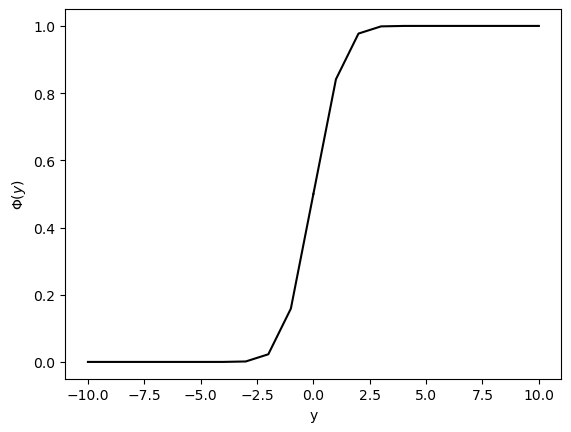

In [6]:
# Verificação das funções
# Vetores para guardar os resultados 
phi_neg_results = []
phi_pos_results = []
y_neg = []
y_pos = []
for y in range(-10 , 11, 1):
    if y < 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
    elif y == 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)
    else:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)

# Plotagem dos resultados
fig, ax = plt.subplots()
ax.plot(y_neg, phi_neg_results, color='black')
ax.plot(y_pos, phi_pos_results, color='black')
plt.xlabel('y')
plt.ylabel('$\\Phi(y)$')
plt.show()

Agora temos que o código abaixo apresenta a implementação da função CDF inversa $y=\Phi^{-1}(u)$

In [7]:
# Formulação da função inversa

# Valores do parâmetro p_i
p = [-0.3222324310880, -1.0000000000000, -0.3422422088547, -0.2042312102450e-1, -0.4536422101480e-4]

# Valores do parâmetro q_i
q = [0.9934846260600e-1, 0.5885815704950, 0.5311034623660, 0.10353775285000, 0.3856070063400e-2]

# Função inversa
# Para 0 < u <= 0.5
def y_1 (u):
    z = np.sqrt(np.log(1 / (u ** 2)))
    return -z - ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

# Para 0.5 <= u < 1
def y_2 (u):
    z = np.sqrt(np.log (1 / ((1 - u) ** 2)))
    return z + ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

Como verificação da implementação, calcula-se $\Beta_{num}=\Phi^{-1}(\Phi(-\Beta))$. O código abaixo apresenta o cálculo de $\Beta_{num}$ e plota o resultado para um intervalo $-8 \leq \Beta \leq 0$

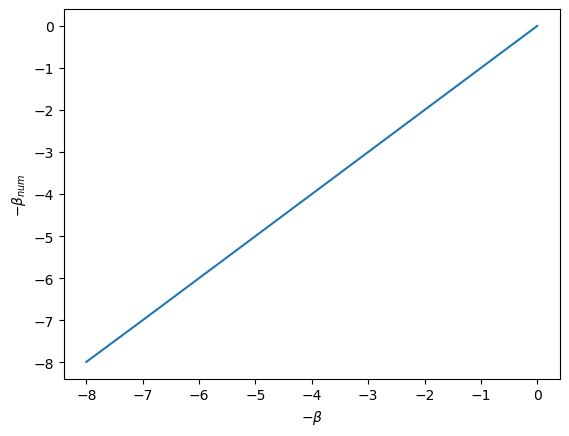

In [8]:
# Verificação da implementação

vetor_beta = [] 
vetor_beta_aprox = []

for i in np.arange (0, 9, 1):
    w_calc = w(i)
    z_calc = z(w_calc)
    vetor_beta.append(-1 * i)
    result = 1- phi_pos(z_calc, i)
    if result > 0:
        if result <= 0.5:
            inverse_result = y_1(result)
        else:
            inverse_result = y_2(result)
        vetor_beta_aprox.append(inverse_result)
   
plt.plot(vetor_beta, vetor_beta_aprox)
plt.xlabel('$-\\beta$')
plt.ylabel('$-\\beta_{num}$')
plt.show()



# Tarefa 2
Temos que no código abaixo possui a implementação das seguintes distribuições: <br>
- Distribuição normal;
- Distribuição log-normal;
- Gumbel para máximos e Gumbel para mínimos <br>

No código abaixo, temos uma estrutura de _data members_, na qual é possível calcular os momentos da distribuição (média, variância, desvio-padrão, coeficiente de variação, skewness e kurtosis) dado os parâmetros. <br>
Além disso, há uma estrutura de _member functions_ que calcula as funções $PDF$, $CDF$ e $CDF^{-1}$ e também calcula os parâmetros dados os momentos.


In [3]:
from scipy import stats as st 
import numpy as np
import matplotlib.pyplot as plt

# Data members
class variavel_aleatoria:
    # Função para identificar qual é a distribuição, o nome da variável e o simbolo da distribuição
    def __init__(self, distribuicao: str, nome: str = "", simbolo: str =""):
        # Identificação
        self.nome = nome
        self.simbolo = simbolo
        self.distribuicao = distribuicao  

        # Lista de argumentos
        self.parametros = []
        self.objeto = None

        # Momentos da variável
        self.media = np.nan 
        self.variancia = np.nan
        self.desvio = np.nan
        self.cv = np.nan # Coeficiente de variação
        self.skewness = np.nan
        self.kurtosis = np.nan

        # Distribuições implementadas
        self.distribuicoes = {
            'normal' : st.norm,
            'lognormal' : st.lognorm,
            'gumbel_max': st.gumbel_r,
            'gumbel_min': st.gumbel_l,
        }

        # Aqui as distribuições contempladas são atribuidas ao componente objeto
        self.objeto = self.distribuicoes[self.distribuicao]

        # Aqui os parâmetros de cada distribuição são definidos e os momentos calculados a partir dos parâmetros
    def conjunto_parametros (self, *params):
        self.parametros = list(params)
        self.calculo_momentos()
    
        # Aqui os momentos são calculados a partir dos parametros
    def calculo_momentos(self):
        m, v, sk, k = self.objeto.stats(*self.parametros, moments = 'mvsk')

        # Armazenamento dos momentos nas variáveis
        self.media = float(m)
        self.variancia = float(v)
        self.desvio = np.sqrt(self.variancia)
        self.skewness = float(sk)
        self.kurtosis = float(k)

        if self.media != 0:
            self.cv = self.desvio / self.media
        else:
            self.cv = np.nan
    
    # Aqui calcula-se os parametros de cada distribuição dado os momentos (média e desvio padrão)
    def calculo_parametros (self, media_dada: float, desvio_dado: float):
        mu = media_dada
        sigma = desvio_dado

        if self.distribuicao =='normal':
            self.conjunto_parametros(mu, sigma)
        
        elif self.distribuicao == 'lognormal':
            zeta = np.sqrt(np.log(1.0 + (sigma / mu) ** 2))
            lam = np.log(mu) - (0.5 * (zeta ** 2))
            scale = np.exp(lam)
            self.conjunto_parametros(zeta, 0.0, scale)

        elif self.distribuicao in ['gumbel_max', 'gumbel_min']:
            mu = media_dada
            sigma = desvio_dado
            gamma = 0.5772156649 #Constante de Euler
            beta = (sigma * np.sqrt(6)) / np.pi 

            if self.distribuicao == 'gumbel_max':
                mu_calc = mu - (gamma * beta)
            else:
                mu_calc = mu + (gamma * beta)
            self.conjunto_parametros(mu_calc, beta)
    
    # Agora vamos construir as funções fundamentais (PDF, CDF, Inversa)
    def PDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.pdf(x, *self.parametros)
        return np.nan
    
    def CDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.cdf(x, *self.parametros)
        return np.nan
    
    def InversaCDF (self, p: float) -> float:
        if self.objeto:
            return self.objeto.ppf(p, *self.parametros)
        return np.nan

Agora, para cada distribuição implementada, vamos testar a estrutura anterior calculando os momentos das variáveis dado os parâmetros e plotando as funções $PDF$ e $x_{aprox} = CDF^{-1}(x,CDF(X,x))$. <br>

# Teste da estrutura para a distribuição normal
Neste teste vamos supor uma variável X ~ N(50,200) e apresentar o cálculo dos momentos à partir dos parâmetros.


In [48]:
#Teste da estrutura
X_normal = variavel_aleatoria(distribuicao = 'normal', nome='VA normal', simbolo='X_N')
media_dada = 200
sigma_dado = 50
X_normal.conjunto_parametros(media_dada, sigma_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição normal: Calculo dos momentos dados os parâmetros')
print(f"X: {X_normal.nome}")
print(f"Parâmetros: {X_normal.parametros}")
print(f"Média calculada: {X_normal.media}")
print(f"Desvio padrão: {X_normal.desvio}")
print(f"Coeficiente de variação: {X_normal.cv}")
print(f"Skewness: {X_normal.skewness}")
print(f"Kurtosis: {X_normal.kurtosis}")

Verificação da distribuição normal: Calculo dos momentos dados os parâmetros
X: VA normal
Parâmetros: (200, 50)
Média calculada: 200.0
Desvio padrão: 50.0
Coeficiente de variação: 0.25
Skewness: 0.0
Kurtosis: 0.0


Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ para um intervalo $\mu - 3\sigma \leq x \leq \mu + 3\sigma$ e também vamos plotar a função $PDF$.

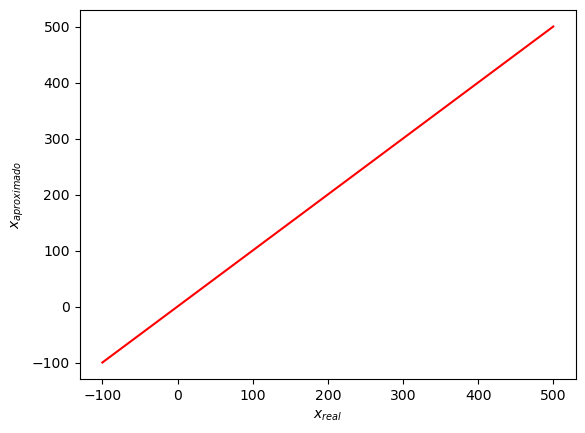

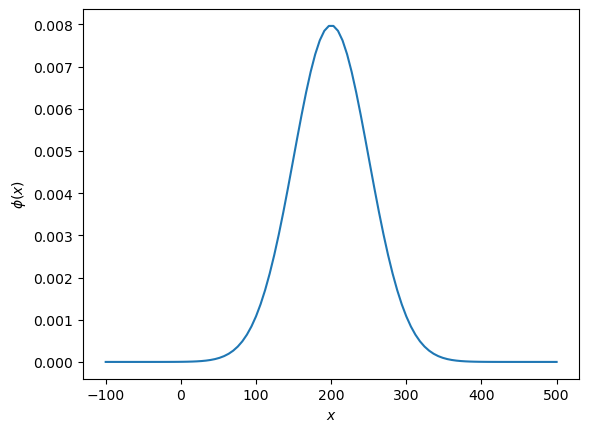

In [49]:
import matplotlib.pyplot as plt

x_min = media_dada - (6 * sigma_dado)
x_max = media_dada + (6 * sigma_dado)
x_real = np.linspace(x_min, x_max, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_normal.CDF(x)
    pdf_calc = X_normal.PDF(x)
    x_calc = X_normal.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# Teste da estrutura para a distribuição lognormal
Neste teste vamos supor uma variável X ~ LN(5, 0.2) e apresentar o cálculo dos momentos à partir dos parâmetros.


In [42]:
#Teste da estrutura
X_lognormal = variavel_aleatoria(distribuicao = 'lognormal', nome='VA lognormal', simbolo='X_LN')
zeta_dado = 0.2
lamb_dado = 5
X_lognormal.conjunto_parametros(zeta_dado, 0, float(np.exp(lamb_dado)))

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição lognormal: Calculo dos momentos dados os parâmetros')
print(f"X: {X_lognormal.nome}")
print(f"Parâmetros: {lamb_dado, zeta_dado}")
print(f"Média calculada: {X_lognormal.media}")
print(f"Desvio padrão: {X_lognormal.desvio}")
print(f"Coeficiente de variação: {X_lognormal.cv}")
print(f"Skewness: {X_lognormal.skewness}")
print(f"Kurtosis: {X_lognormal.kurtosis}")

Verificação da distribuição lognormal: Calculo dos momentos dados os parâmetros
X: VA lognormal
Parâmetros: (5, 0.2)
Média calculada: 151.41130379405274
Desvio padrão: 30.587622095939498
Coeficiente de variação: 0.20201676710706024
Skewness: 0.6142947619866632
Kurtosis: 0.6783657771754372


Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ e também vamos plotar a função $PDF$.

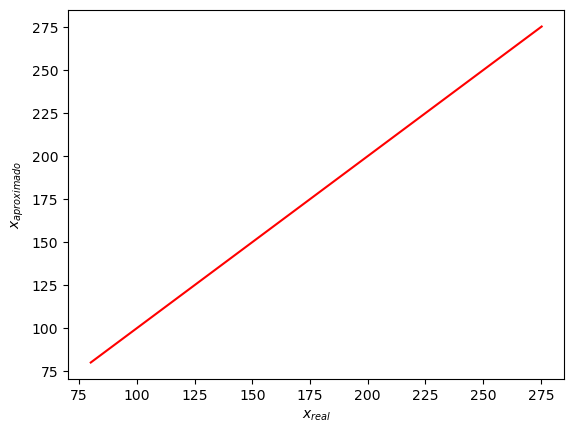

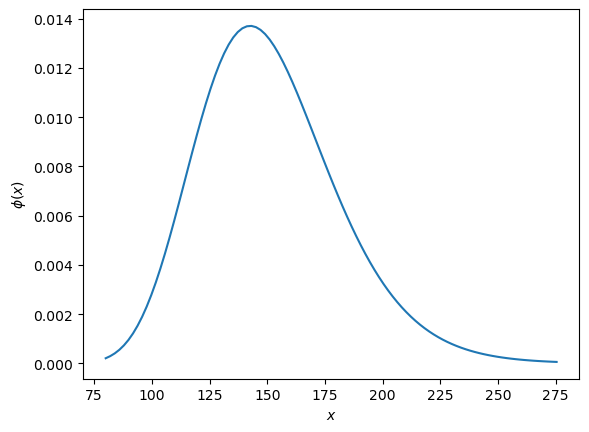

In [46]:
import matplotlib.pyplot as plt

x_min = 0.001
x_max = 0.999
x_min_plot = X_lognormal.InversaCDF(x_min)
x_max_plot = X_lognormal.InversaCDF(x_max)
x_real = np.linspace(x_min_plot, x_max_plot, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_lognormal.CDF(x)
    pdf_calc = X_lognormal.PDF(x)
    x_calc = X_lognormal.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# Teste da estrutura para a distribuição Gumbel para máximos
Neste teste vamos supor uma variável EVI ~ LN(5, 0.1) e apresentar o cálculo dos momentos à partir dos parâmetros.

In [57]:
#Teste da estrutura
X_gumbel_max = variavel_aleatoria(distribuicao = 'gumbel_max', nome='VA Gumbel para máximos', simbolo='X_EVI')
mi_dado = 5
beta_dado = 0.1
X_gumbel_max.conjunto_parametros(mi_dado, beta_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição Gumbel para máximos: Calculo dos momentos dados os parâmetros')
print(f"X: {X_gumbel_max.nome}")
print(f"Parâmetros: {mi_dado, beta_dado}")
print(f"Média calculada: {X_gumbel_max.media}")
print(f"Desvio padrão: {X_gumbel_max.desvio}")
print(f"Coeficiente de variação: {X_gumbel_max.cv}")
print(f"Skewness: {X_gumbel_max.skewness}")
print(f"Kurtosis: {X_gumbel_max.kurtosis}")

Verificação da distribuição Gumbel para máximos: Calculo dos momentos dados os parâmetros
X: VA Gumbel para máximos
Parâmetros: (5, 0.1)
Média calculada: 5.057721566490153
Desvio padrão: 0.1282549830161864
Coeficiente de variação: 0.025358252986075306
Skewness: 1.1395470994046486
Kurtosis: 2.4


Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ e também vamos plotar a função $PDF$.

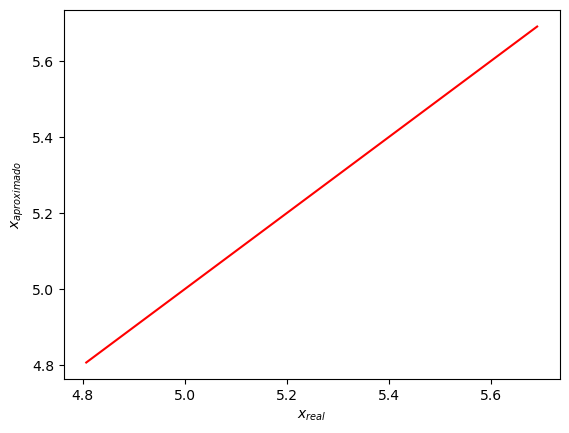

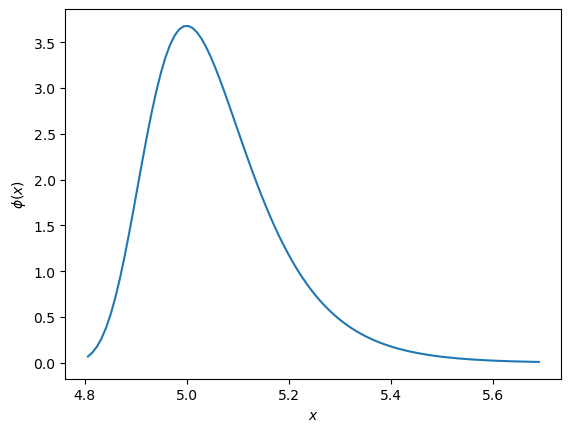

In [58]:
import matplotlib.pyplot as plt

x_min = 0.001
x_max = 0.999
x_min_plot = X_gumbel_max.InversaCDF(x_min)
x_max_plot = X_gumbel_max.InversaCDF(x_max)
x_real = np.linspace(x_min_plot, x_max_plot, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_gumbel_max.CDF(x)
    pdf_calc = X_gumbel_max.PDF(x)
    x_calc = X_gumbel_max.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# Teste da estrutura para a distribuição Gumbel para mínimo
Neste teste vamos supor uma variável EVI ~ LN(5, 0.1) e apresentar o cálculo dos momentos à partir dos parâmetros.

In [62]:
#Teste da estrutura
X_gumbel_min = variavel_aleatoria(distribuicao = 'gumbel_min', nome='VA Gumbel para mínimos', simbolo='X_EVI')
mi_dado = 5
beta_dado = 0.1
X_gumbel_min.conjunto_parametros(mi_dado, beta_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição Gumbel para mínimos: Calculo dos momentos dados os parâmetros')
print(f"X: {X_gumbel_min.nome}")
print(f"Parâmetros: {mi_dado, beta_dado}")
print(f"Média calculada: {X_gumbel_min.media}")
print(f"Desvio padrão: {X_gumbel_min.desvio}")
print(f"Coeficiente de variação: {X_gumbel_min.cv}")
print(f"Skewness: {X_gumbel_min.skewness}")
print(f"Kurtosis: {X_gumbel_min.kurtosis}")

Verificação da distribuição Gumbel para mínimos: Calculo dos momentos dados os parâmetros
X: VA Gumbel para mínimos
Parâmetros: (5, 0.1)
Média calculada: 4.942278433509847
Desvio padrão: 0.1282549830161864
Coeficiente de variação: 0.025950578208339396
Skewness: -1.1395470994046486
Kurtosis: 2.4


Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ e também vamos plotar a função $PDF$.

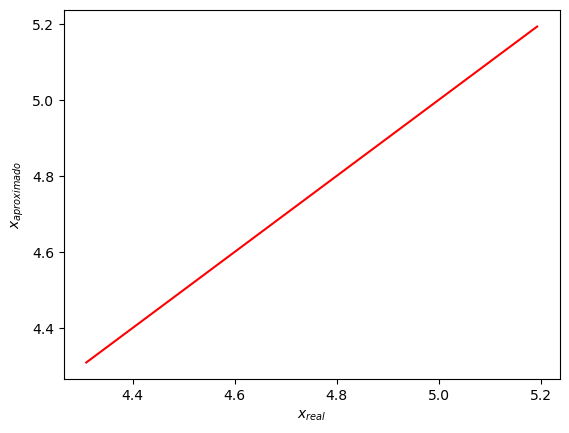

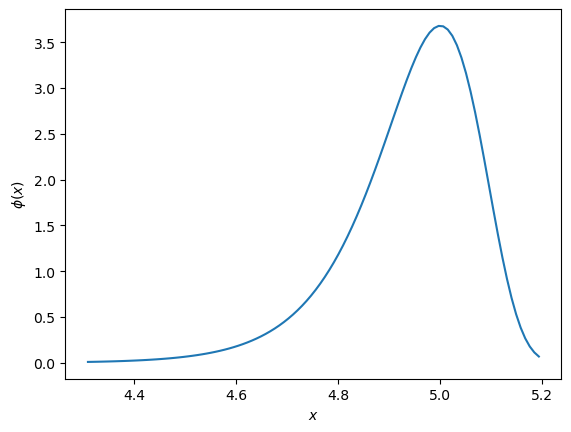

In [63]:
import matplotlib.pyplot as plt

x_min = 0.001
x_max = 0.999
x_min_plot = X_gumbel_min.InversaCDF(x_min)
x_max_plot = X_gumbel_min.InversaCDF(x_max)
x_real = np.linspace(x_min_plot, x_max_plot, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_gumbel_min.CDF(x)
    pdf_calc = X_gumbel_min.PDF(x)
    x_calc = X_gumbel_min.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# TAREFA 3

In [ ]:
import numpy as np
from UQpy.transformations import Nataf
from UQpy.distributions import Normal as uqpynormal
from UQpy.distributions import Lognormal as uqpylognormal
from UQpy.distributions.collection import GeneralizedExtreme as uqpygev  
from scipy.stats import norm 

# Função de mapeamento para o uso do UQpy que retorna os parametros de cada distribuição
def mapeamento_uqpy(va_cust):
    tipo = va_cust.distribuicao.lower()
    parametros = va_cust.parametros

    if tipo == 'normal':
        return uqpynormal(loc=parametros[0], scale=parametros[1])

    elif tipo == 'lognormal':
        return uqpylognormal(s=parametros[0], loc=parametros[1], scale=parametros[2])
    
    elif tipo in ['gumbel_max', 'gumbel_min']:
        shape_c = 0.0
        loc = parametros[0]   
        scale = parametros[1] 
        return uqpygev(c=shape_c, loc=loc, scale=scale)
    
    else:
        raise ValueError(f"Distribuição '{tipo}' não mapeada")
        
# Data members
class vetores_variavel_aleatoria:
    matriz_observações: np.ndarray # Cada linha é uma variável aleatória X_i e cada coluna uma observação
    vetor_va_cust: list
    matriz_correlacao_x: np.ndarray # Matriz de correlação
    matriz_correlacao_z: np.ndarray = None
    conjunto_z_correlacionado: np.ndarray = None
    conjunto_y_descorrelacionado: np.ndarray = None

    # Função de recebimento do vetor
    def __init__(self, matriz_observacoes: np.ndarray, vetor_va_cust: list):
        
        self.matriz_observações = matriz_observacoes
        self.vetor_va_cust = vetor_va_cust
        self.calc_matriz_correlacao()

    # Determinação da dimensão do vetor de variáveis aleatórias
    def dimensao (self) -> tuple:
        return self.matriz_observações.shape
    
    # Calculo da matriz de correlação Rx
    def calc_matriz_correlacao(self):
        self.matriz_correlacao_x = np.corrcoef(self.matriz_observações)
        return self.matriz_correlacao_x

    # Calculo da matriz de correlação no espaço normal padrão (Rz) 
    def matriz_correlacao_nataf(self) -> np.ndarray:
        distribuicoes_uqpy = [mapeamento_uqpy(va) for va in self.vetor_va_cust]
        
        nataf_obj = Nataf(distributions=distribuicoes_uqpy, corr_x=self.matriz_correlacao_x)
        
        Rz = nataf_obj.corr_z # Matriz de corelação zij
        self.matriz_correlacao_z = Rz
        Z = nataf_obj.samples_z # Retorna o conjunto Z normal padrão com as correlações
        self.conjunto_z_correlacionado = Z

        return Rz
    
    # Matriz de eliminação da correlação via decomposição de Cholesky
    def decomposicao_cholesky(self) -> np.ndarray:
        B = np.linalg.cholesky(self.matriz_correlacao_z)
        B_inv = np.linalg.inv(B)
        
        L = np.linalg.inv(B.T)
        Jyz = np.linalg.inv(L) # Jacobiano Jyz
        Jzy = L # Jacobiano Jzy

        return Jyz, Jzy
    
    # Encontra o vetor Z descorrelacionado via decomposição ortogonal da matriz Rz
    def descorrelacao_autovetores(self) -> np.ndarray:
        Rz = self.matriz_correlacao_z

        # W é o vetor de autovalores
        # V é a matriz onde cada coluna é um autovetor de Rz 
        W, A_barra = np.linalg.eigh(Rz) 

        # Construção da diagonal da matriz inversa dos auto-valores
        Lambda_inv_sqrt = np.diag(1.0 / np.sqrt(W))

        # Matriz de descorrelação A
        A = A_barra @ Lambda_inv_sqrt

        # Jacobiano Jyz
        Jyz = A.T

        # Jacobiano Jzy
        Jzy = np.linalg.inv(A.T)

        return Jyz, Jzy
    
# Obtenção dos parametros normais equivalentes
    def parametros_normal_equivalente (self) -> dict:
        
        # Calcula a média e desvio padrão da tranformação X -> Z
        parametros_eq = {}
        
        for i, va in enumerate(self.vetor_va_cust):
            tipo = va.distribuicao.lower()
            mu_eq = None
            sigma_eq = None
            if tipo == 'normal':
                mu_eq = va.parametros[0]
                sigma_eq = va.parametros[1]
            
            elif tipo == 'lognormal':

                zeta = va.parametros[0]
                loc = va.parametros[1]
                scale = va.parametros[2]

                mu_eq = np.log(scale) + loc
                sigma_eq = zeta

            elif tipo in ['gumbel_max', 'gumbel_min']:
                mu_x = va.media
                sigma_x = va.desvio

                gamma = 0.5772156649
                sigma_eq_gumbel = (sigma_x * np.sqrt(6)) / np.pi
                mu_eq_gumbel = mu_x - (sigma_eq_gumbel * gamma)

                if tipo == 'gumbel_min':
                    mu_eq_gumbel = mu_x + (sigma_eq_gumbel * gamma)

                mu_eq = mu_eq_gumbel
                sigma_eq = sigma_eq_gumbel

            if mu_eq is not None:
                parametros_eq[va.nome] = [float(mu_eq), float(sigma_eq)]
                
        return parametros_eq

    def parametros_matriciais_equivalentes(self) -> tuple[np.ndarray, np.ndarray]:
        parametros_escalares = self.parametros_normal_equivalente()

        mu_eq_lista = []
        sigma_eq_lista = []

        for va in self.vetor_va_cust:
            nome_va = va.nome

            if nome_va in parametros_escalares:
                mu_eq, sigma_eq = parametros_escalares[nome_va]
                mu_eq_lista.append(mu_eq)
                sigma_eq_lista.append(sigma_eq)
            else:
                raise ValueError(f"Parâmetros da VA'{nome_va}")
        
        mu_eq_vetor = np.array(mu_eq_lista)
        D_eq_matriz = np.diag(sigma_eq_lista)

        return mu_eq_vetor, D_eq_matriz
    
    # Calculo dos Jacobianos Jzx e Jxz
    def jacobiano_composto_cholesky(self) -> tuple[np.ndarray, np.ndarray]:
        
        Jyz, Jzy = self.decomposicao_cholesky()
        mu_eq, D_eq = self.parametros_matriciais_equivalentes()

        D_eq_inv = np.linalg.inv(D_eq)

        # Jacobianos
        J_yx = Jyz @ D_eq_inv
        J_xy = D_eq @ Jzy

        return J_xy, J_yx
    
    def jacobiano_composto_decomposicao_ortogonal(self) -> tuple[np.ndarray, np.ndarray]:
        
        Jyz, Jzy = self.descorrelacao_autovetores()
        mu_eq, D_eq = self.parametros_matriciais_equivalentes()

        D_eq_inv = np.linalg.inv(D_eq)

        # Jacobianos
        J_yx = Jyz @ D_eq_inv
        J_xy = D_eq @ Jzy

        return J_xy, J_yx

    
    def jacobiano_nataf_zx(self, vetor_x: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
                   
        termos_diagonais_zx = []
        
        for i, va in enumerate(self.vetor_va_cust):
            x_i = vetor_x[i]
            
            # Cálculo dos componentes para dZ_i/dX_i = f_X(x_i) / phi(z_i)
            cdf_xi = va.CDF(x_i)
            z_i = norm.ppf(cdf_xi)
            phi_zi = norm.pdf(z_i)
            pdf_xi = va.PDF(x_i)
            
            if phi_zi == 0 or pdf_xi == 0:
                 # Tratar casos extremos com valor pequeno
                 derivada_zx_i = 1e-12 
            else:
                 derivada_zx_i = pdf_xi / phi_zi
                 
            termos_diagonais_zx.append(derivada_zx_i)

        J_ZX = np.diag(termos_diagonais_zx)
        J_XZ = np.linalg.inv(J_ZX) 
        
        return J_ZX, J_XZ


In [8]:
# Primeira verificação da estrutura
# Neste exemplo vamos considerar duas variáveis com disttibuições normal e lognormal

# X1_media = 10 e desvio = 2
# X_2_lamb = 1 e zeta = 0.5
# sendo Rx dado

media_1, sigma_1 = 10.0, 2.0
lambda_2, zeta2 = 1.0, 0.5

# Iniciando a variável X_1
X1 = variavel_aleatoria(distribuicao='normal', nome='X1', simbolo="X_1-N")
X1.conjunto_parametros(media_1, sigma_1)

# Iniciando X_2
loc2, scale2 = 0.0, np.exp(lambda_2)
X2 = variavel_aleatoria(distribuicao='lognormal', nome='X2', simbolo="X_2-LN")
X2.conjunto_parametros(zeta2, loc2, scale2)

# Vetor das variáveis aleatórias
vetor_va = [X1, X2]

# Matriz de correlação Rx já fornecida
Rx_entrada = np.array([[1,0.6], 
                       [0.6, 1]])

# Matriz de observações apernas para iniciar o algoritmo
matriz_obs = np.array([[0,0], 
                       [0, 0]])

# Inicializar o algoritmo "vetores_variavel_aleatoria"
vx_obj = vetores_variavel_aleatoria(matriz_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada

# Calculo da matriz de correlação de Nataf (Cz)
Cz = vx_obj.matriz_correlacao_nataf()

# Determinação dos parametros (média e desvio) das normais equivalentes
mu_eq, D_eq = vx_obj.parametros_matriciais_equivalentes()

# Jacobiano Jyz
Lz = vx_obj.decomposicao_cholesky()
Jyz = np.linalg.inv(Lz)

#Impressão dos resultados
print("\n--- 1. PARÂMETROS E EQUIVALENTES ---")
print(f"Média de X1 (Normal): {X1.media:.4f}, DP: {X1.desvio:.4f}")
print(f"Média de X2 (LogN, Analítica): {X2.media:.4f}, DP: {X2.desvio:.4f}")
print("-" * 40)
print(f"Vetor de Médias Equivalentes (µeq):\n{mu_eq.round(4)}")
# Gabarito µeq: [10.0, 1.0] (Média X1, Lambda X2)
print(f"Matriz de DP Equivalentes (Deq):\n{D_eq.round(4)}")
# Gabarito Deq: [[2.0, 0.0], [0.0, 0.5]] (DP X1, Zeta X2)

print("\n--- 2. MATRIZES DE CORRELAÇÃO ---")
print(f"Matriz de Correlação Amostral (Rx):\n{Rx_entrada.round(4)}")
print(f"Matriz de Correlação Nataf (CZ):\n{Cz.round(4)}")
print(f"Correlação CZ[0,1] Esperada (aprox.): 0.627")

print("\n--- 3. JACOBIANO DA DESCORRELAÇÃO (CHOLESKY) ---")
print("Jacobiano J(Y<-Z) [Jyz = Lz^-1]:")
print(Jyz.round(4))
# Gabarito Jyz: Matriz triangular superior, Lz invertida.



--- 1. PARÂMETROS E EQUIVALENTES ---
Média de X1 (Normal): 10.0000, DP: 2.0000
Média de X2 (LogN, Analítica): 3.0802, DP: 1.6416
----------------------------------------
Vetor de Médias Equivalentes (µeq):
[10.  1.]
Matriz de DP Equivalentes (Deq):
[[2.  0. ]
 [0.  0.5]]

--- 2. MATRIZES DE CORRELAÇÃO ---
Matriz de Correlação Amostral (Rx):
[[1.  0.6]
 [0.6 1. ]]
Matriz de Correlação Nataf (CZ):
[[1.     0.6395]
 [0.6395 1.    ]]
Correlação CZ[0,1] Esperada (aprox.): 0.627

--- 3. JACOBIANO DA DESCORRELAÇÃO (CHOLESKY) ---
Jacobiano J(Y<-Z) [Jyz = Lz^-1]:
[[[ 1.     -0.8319]
  [ 0.      1.3008]]

 [[ 1.      0.6395]
  [ 0.      0.7688]]]


In [ ]:
import numpy as np
import scipy.stats as st
# Importações UQpy e classes customizadas devem estar definidas

# --- 1. CONFIGURAÇÃO DA VA (T2) COM PARÂMETROS CONHECIDOS ---

# Parâmetros analíticos que satisfazem a Média e o DP
# (Assumimos que sua classe VA tem o método CalculateParametersFromMoments para LogN/Gumbel)

# VA 1: Normal (mu=10.0, sigma=2.0)
X1 = variavel_aleatoria(distribuicao='normal', nome='X1_Normal', simbolo='X1')
X1.conjunto_parametros(10.0, 2.0)

# VA 2: Log-Normal (Converte de E[X]=12, DP[X]=3 para [zeta, loc, scale])
X2 = variavel_aleatoria(distribuicao='lognormal', nome='X2_LogNormal', simbolo='X2')
X2.calculo_parametros(12.0, 3.0) 

# VA 3: Gumbel Máx (Converte de E[X]=8, DP[X]=1.5 para [loc, scale])
X3 = variavel_aleatoria(distribuicao='gumbel_max', nome='X3_GumbelMax', simbolo='X3')
X3.calculo_parametros(8.0, 1.5)

# VA 4: Gumbel Mín (Converte de E[X]=5, DP[X]=1.0 para [loc, scale])
X4 = variavel_aleatoria(distribuicao='gumbel_min', nome='X4_GumbelMin', simbolo='X4')
X4.calculo_parametros(5.0, 1.0)

vetor_va = [X1, X2, X3, X4]

# --- 2. DADOS DE ENTRADA (Simulação da Correlação, 10 observações dummy) ---
Rx_entrada = np.array([
    [1.0, 0.4, 0.0, 0.0],
    [0.4, 1.0, 0.0, 0.5],
    [0.0, 0.0, 1.0, 0.5],
    [0.0, 0.5, 0.5, 1.0]
])

# Matriz de observações é necessária apenas para o shape (4 VAs, N=10 observações)
matriz_dummy_obs = np.zeros((4, 10)) 

vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)

# Forçamos Rx para a matriz de entrada
vx_obj.matriz_correlacao_x = Rx_entrada

# Vetor de Avaliação (Média Amostral de cada VA)
vetor_x_medio = np.array([va.media for va in vetor_va])

# Cálculo das Matrizes
Cz = vx_obj.matriz_correlacao_nataf()
mu_eq, D_eq = vx_obj.parametros_matriciais_equivalentes()
Lz = vx_obj.decomposicao_cholesky()

# Cálculo dos Jacobianos
J_ZX, J_XZ = vx_obj.jacobiano_nataf_zx(vetor_x_medio)
J_YX_Cholesky, J_XY_Cholesky = vx_obj.jacobiano_composto_cholesky()
J_YX_Autovetores, J_XY_Autovetores = vx_obj.jacobiano_composto_decomposicao_ortogonal()

# Jacobianos Jyz e Jzy (Lz e Lz^-1)
Lz_inv = np.linalg.inv(Lz)
Jyz_cholesky = Lz_inv
Jzy_cholesky = Lz
# Jacobianos Jyz e Jzy (Autovetores - Extração da matriz Az)
Jyz_autovetores = J_YX_Autovetores @ D_eq
Jzy_autovetores = J_XY_Autovetores @ np.linalg.inv(D_eq)


# =========================================================================
# GABARITO E IMPRESSÃO DE VERIFICAÇÃO FINAL
# =========================================================================
print("\n" + "="*80)
print("             GABARITO E VERIFICAÇÃO - TESTE MÚLTIPLO T3")
print("="*80)

print("\n--- 1. PROPRIEDADES E DADOS DE ENTRADA ---")
print(f"Dimensão do Vetor de VAs (VAs, Obs): {vx_obj.dimensao()}")
print(f"Vetor de Variáveis Aleatórias (Tipos): {[va.distribuicao.upper() for va in vetor_va]}")

print("\n--- 2. PARÂMETROS EQUIVALENTES (µeq, Deq) ---")
print(f"Vetor de Médias Equivalentes (µeq):\n{mu_eq.round(5)}")
print(f"Matriz Diagonal de DP Equivalentes (Deq):\n{D_eq.round(5)}")
# GABARITO D_eq (Diagonal): [2.0, 0.2462, 1.1661, 0.7845]

print("\n--- 3. MATRIZES DE CORRELAÇÃO (Distortion Check) ---")
print(f"Matriz de Correlação Amostral (Rx):\n{Rx_entrada.round(5)}")
print(f"Matriz de Correlação Nataf (Cz):\n{Cz.round(5)}")
# VERIFICAÇÃO: Cz[0, 1] (N-LN, 0.4) deve ter distorção (≈ 0.413)

print("\n--- 4. JACOBIANOS ISOPROBABILÍSTICOS (Jzx, Jxz) ---")
print(f"Jacobiano J(Z<-X) [Jzx] na Média:\n{J_ZX.round(5)}")
print(f"Jacobiano J(X<-Z) [Jxz] na Média:\n{J_XZ.round(5)}")
# VERIFICAÇÃO: Ambas são matrizes diagonais. Jzx[i,i] para X1 (Normal) deve ser 1/1 = 1.0.

print("\n--- 5. DESCORRELAÇÃO VIA CHOLESKY ---")
print(f"Matriz de Cholesky (Lz, Jzy):\n{Rz.round(5)}")
print(f"Jacobiano J(Y<-Z) [Jyz = Lz^-1]:\n{Jyz_cholesky.round(5)}")
# VERIFICAÇÃO: Jyz deve ser triangular superior (Lz^-1)

print("\n--- 6. JACOBIANOS COMPOSTOS (X <-> Y) - CHOL.) ---")
print(f"Jacobiano J(Y<-X) [Jyx]:\n{J_YX_Cholesky.round(5)}")
print(f"Jacobiano J(X<-Y) [Jxy]:\n{J_XY_Cholesky.round(5)}")

print("\n--- 7. JACOBIANOS COMPOSTOS (X <-> Y) - AUTOVETORES ---")
print(f"Jacobiano J(Y<-X) [Jyx]:\n{J_YX_Autovetores.round(5)}")
print(f"Jacobiano J(X<-Y) [Jxy]:\n{J_XY_Autovetores.round(5)}")

print("\n--- 8. JACOBIANOS DA DESCORRELAÇÃO (ORTOGONAL) ---")
print(f"Jacobiano J(Y<-Z) [Jyz]:\n{Jyz_autovetores.round(5)}")
print(f"Jacobiano J(Z<-Y) [Jzy]:\n{Jzy_autovetores.round(5)}")
print("="*80)


             GABARITO E VERIFICAÇÃO - TESTE MÚLTIPLO T3

--- 1. PROPRIEDADES E DADOS DE ENTRADA ---
Dimensão do Vetor de VAs (VAs, Obs): (4, 10)
Vetor de Variáveis Aleatórias (Tipos): ['NORMAL', 'LOGNORMAL', 'GUMBEL_MAX', 'GUMBEL_MIN']

--- 2. PARÂMETROS EQUIVALENTES (µeq, Deq) ---
Vetor de Médias Equivalentes (µeq):
[10.       2.45459  7.32492  5.45005]
Matriz Diagonal de DP Equivalentes (Deq):
[[2.      0.      0.      0.     ]
 [0.      0.24622 0.      0.     ]
 [0.      0.      1.16955 0.     ]
 [0.      0.      0.      0.7797 ]]

--- 3. MATRIZES DE CORRELAÇÃO (Distortion Check) ---
Matriz de Correlação Amostral (Rx):
[[1.  0.4 0.  0. ]
 [0.4 1.  0.  0.5]
 [0.  0.  1.  0.5]
 [0.  0.5 0.5 1. ]]
Matriz de Correlação Nataf (Cz):
[[ 1.       0.40614 -0.      -0.     ]
 [ 0.40614  1.      -0.       0.51222]
 [-0.      -0.       1.       0.51543]
 [-0.       0.51222  0.51543  1.     ]]

--- 4. JACOBIANOS ISOPROBABILÍSTICOS (Jzx, Jxz) ---
Jacobiano J(Z<-X) [Jzx] na Média:
[[0.5     0.   

NameError: name 'Rz' is not defined